In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading data and EDA

In [3]:
df = pd.read_csv('restaurant-data.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200847 entries, 0 to 200846
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   transactionstarttime  200847 non-null  object
 1   transactionnumber     200847 non-null  int64 
 2   timestamp             200847 non-null  object
 3   coursename            200847 non-null  object
 4   coursenumber          200847 non-null  int64 
 5   coursestarttime       200847 non-null  object
 6   itemcooktime          200847 non-null  int64 
 7   itemdescription       200847 non-null  object
 8   itemid                200847 non-null  int64 
 9   itemquantity          200847 non-null  int64 
 10  itemnumber            200847 non-null  int64 
 11  parentitemnumber      200847 non-null  int64 
dtypes: int64(7), object(5)
memory usage: 18.4+ MB


In [5]:
df.describe()

,transactionnumber,coursenumber,itemcooktime,itemid,itemquantity,itemnumber,parentitemnumber
count,2.008470e+05,200847.000000,200847.000000,200847.000000,200847.000000,2.008470e+05,2.008470e+05
mean,1.595075e+06,2.080041,238.250773,15568.038253,0.999084,1.667881e+08,7.291816e+07
std,2.479370e+06,1.330705,55.964681,13345.848918,0.030254,2.596816e+08,1.906006e+08
min,1.000100e+04,1.000000,20.000000,116.000000,0.000000,1.048592e+06,0.000000e+00
25%,3.003600e+04,1.000000,240.000000,4523.000000,1.000000,3.162138e+06,0.000000e+00
50%,5.001100e+04,2.000000,240.000000,15410.000000,1.000000,5.250064e+06,0.000000e+00
75%,5.560050e+06,3.000000,240.000000,21358.000000,1.000000,5.830094e+08,4.212167e+06
max,5.560620e+06,17.000000,1322.000000,89346.000000,1.000000,5.830253e+08,5.830253e+08


In [6]:
df.shape

(200847, 12)

In [7]:
df.columns

Index(['transactionstarttime', 'transactionnumber', 'timestamp', 'coursename',
       'coursenumber', 'coursestarttime', 'itemcooktime', 'itemdescription',
       'itemid', 'itemquantity', 'itemnumber', 'parentitemnumber'],
      dtype='object')

In [8]:
missing_values = df.isnull().sum()
missing_values

transactionstarttime    0
transactionnumber       0
timestamp               0
coursename              0
coursenumber            0
coursestarttime         0
itemcooktime            0
itemdescription         0
itemid                  0
itemquantity            0
itemnumber              0
parentitemnumber        0
dtype: int64

In [9]:
df.head()

,transactionstarttime,transactionnumber,timestamp,coursename,coursenumber,coursestarttime,itemcooktime,itemdescription,itemid,itemquantity,itemnumber,parentitemnumber
0,2022-03-06 11:06:56,30001,2022-03-06 11:34:09,ENTREES,3,2022-03-06 11:17:26,240,Kids LoMein 2oz,8208,1,3145987,0
1,2022-03-06 11:06:56,30001,2022-03-06 11:34:09,ENTREES,3,2022-03-06 11:17:26,240,Kid's Fruit,8213,1,3146002,3145987
2,2022-03-06 11:06:56,30001,2022-03-06 11:34:09,ENTREES,3,2022-03-06 11:17:26,240,Kid's Fruit,8213,1,3146008,3145987
3,2022-03-06 11:12:59,30002,2022-03-06 11:34:58,ENTREES,3,2022-03-06 11:30:05,240,Kids FR 2oz,8209,1,3150773,0
4,2022-03-06 11:12:59,30002,2022-03-06 11:34:58,ENTREES,3,2022-03-06 11:30:05,240,Kid's Fruit,8213,1,3150836,3150773


In [10]:
#converting dates
df['transactionstarttime'] = pd.to_datetime(df['transactionstarttime'])

In [22]:
#feature selection
df['ds'] = df['transactionstarttime'].dt.date
sales = df.groupby('ds')['itemquantity'].sum().reset_index()
sales.columns = ['ds', 'y']

In [23]:
sales.head()

,ds,y
0,2022-03-01,4133
1,2022-03-02,4744
2,2022-03-03,5328
3,2022-03-04,8057
4,2022-03-05,9872


In [24]:
sales.tail()

,ds,y
25,2022-03-26,10877
26,2022-03-27,8696
27,2022-03-28,6036
28,2022-03-29,6364
29,2022-03-30,5691


In [25]:
sales.shape

(30, 2)

In [26]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ds      30 non-null     object
 1   y       30 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 612.0+ bytes


<Axes: >

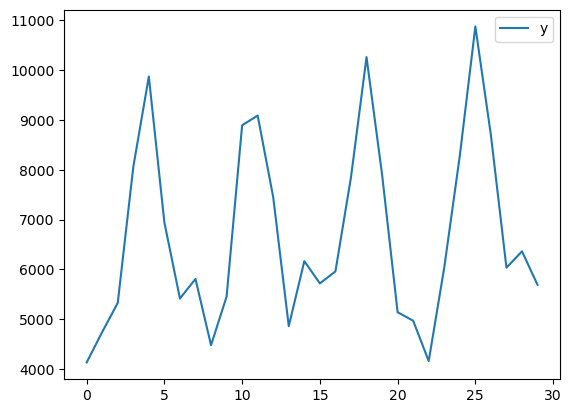

In [27]:
sales.plot()

In [28]:
sales.head()

,ds,y
0,2022-03-01,4133
1,2022-03-02,4744
2,2022-03-03,5328
3,2022-03-04,8057
4,2022-03-05,9872


In [29]:
from prophet import Prophet

In [30]:
m = Prophet(interval_width = 0.95, daily_seasonality = True)
model = m.fit(sales)

14:08:19 - cmdstanpy - INFO - Chain [1] start processing
14:08:20 - cmdstanpy - INFO - Chain [1] done processing


In [40]:
future_sales = m.make_future_dataframe(periods = 30, freq = 'D')#D indicates daily, M(monthly), W(weekly), H(hourly)
#period = n: to forecast for next n-days.
forecast = m.predict(future_sales)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-03-01,355.587621,4035.731593,5941.643268,355.587621,355.587621,4584.196740,4584.196740,4584.196740,5868.881136,5868.881136,5868.881136,-1284.684396,-1284.684396,-1284.684396,0.0,0.0,0.0,4939.784361
1,2022-03-02,394.793580,3468.093520,5452.077050,394.793580,394.793580,4015.409519,4015.409519,4015.409519,5868.881136,5868.881136,5868.881136,-1853.471617,-1853.471617,-1853.471617,0.0,0.0,0.0,4410.203099
2,2022-03-03,433.999539,4364.207652,6196.275097,433.999539,433.999539,4850.015143,4850.015143,4850.015143,5868.881136,5868.881136,5868.881136,-1018.865993,-1018.865993,-1018.865993,0.0,0.0,0.0,5284.014682
3,2022-03-04,473.205498,6899.868766,8850.138479,473.205498,473.205498,7385.613353,7385.613353,7385.613353,5868.881136,5868.881136,5868.881136,1516.732217,1516.732217,1516.732217,0.0,0.0,0.0,7858.818851
4,2022-03-05,512.411457,8691.972654,10596.279049,512.411457,512.411457,9100.272793,9100.272793,9100.272793,5868.881136,5868.881136,5868.881136,3231.391657,3231.391657,3231.391657,0.0,0.0,0.0,9612.684250


<Axes: >

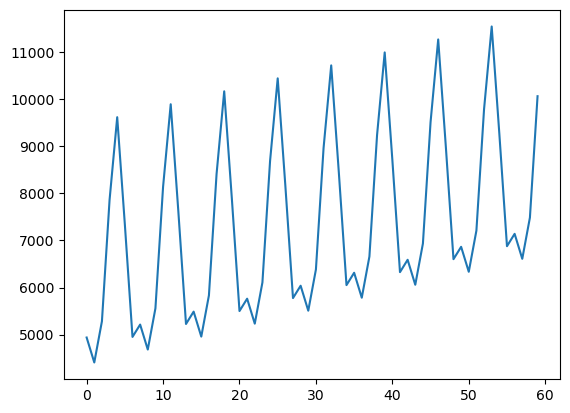

In [38]:
forecast['yhat'].plot()

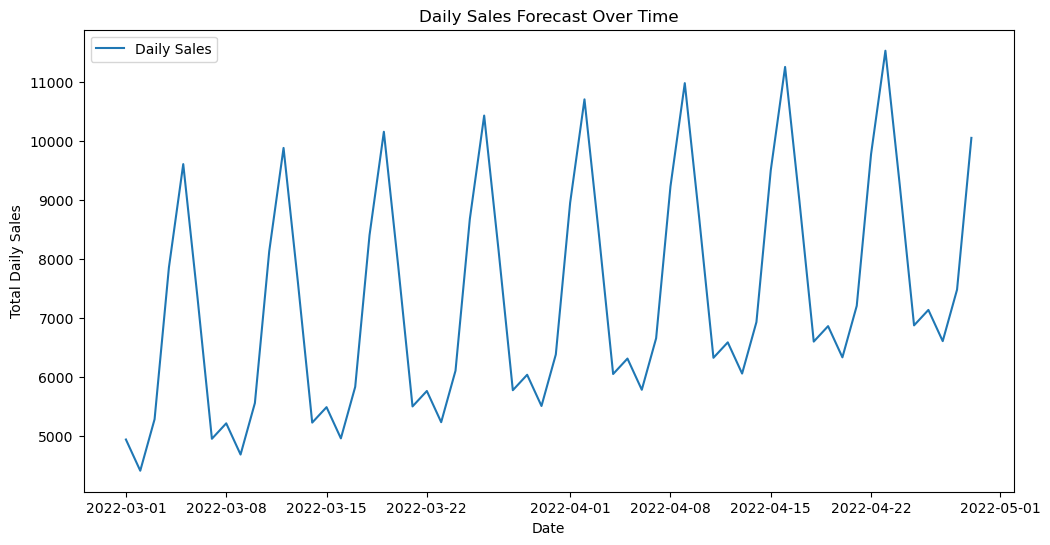

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(forecast['ds'], forecast['yhat'], label='Daily Sales')
plt.xlabel('Date')
plt.ylabel('Total Daily Sales')
plt.title('Daily Sales Forecast Over Time')
plt.legend()
plt.show()

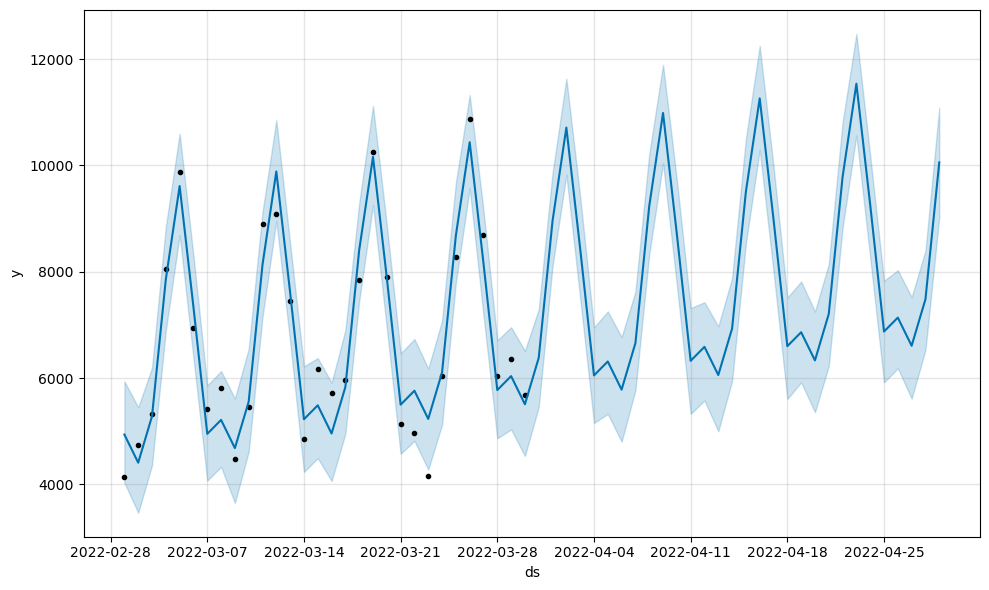

In [42]:
plot1 = m.plot(forecast)

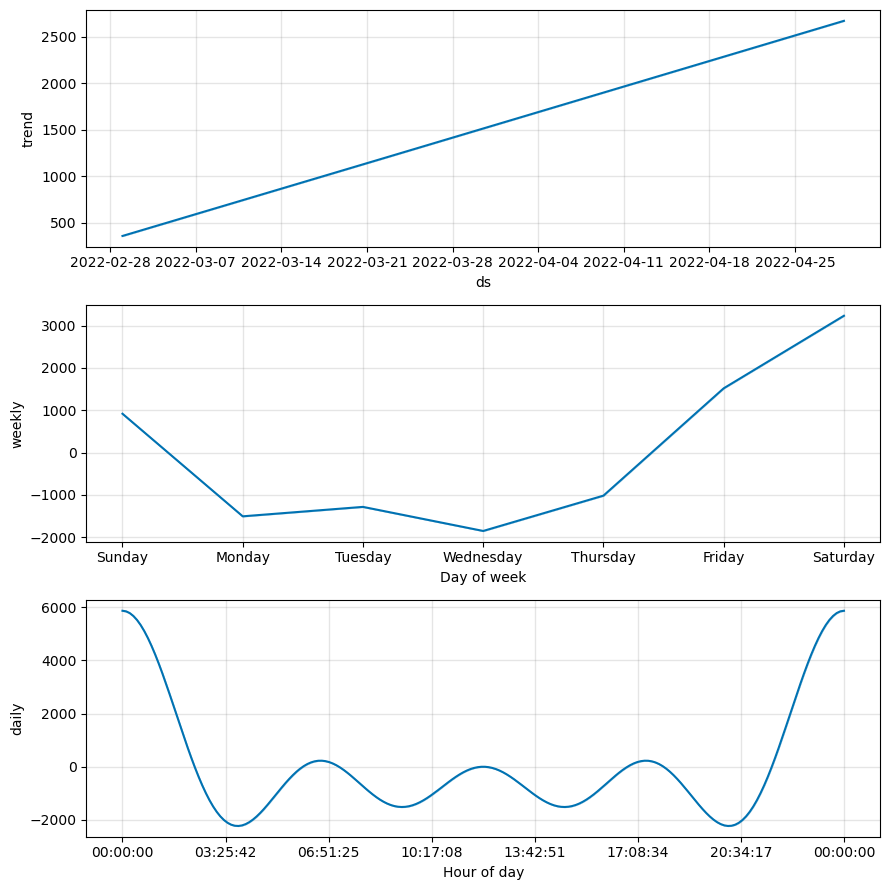

In [43]:
plot2 = m.plot_components(forecast)